In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc #!!! pip install mplfinance, pip install --upgrade mplfinance

C:\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


# Tweets And Bitcoin Price
## Research how the tweets with "btc" or "bitcoin" is correlated with Bitcoin price / 2018

### Abstract
By using twitter activities can help to predict movement of bitcoin price. Activity is measured by the numbers of creating tweets and replies which they receive. It can be seen that when the activity increases it leads to the end of a trend, a reversal of a trend, or the beginning of a new trend. All of this allows for the realization of a fundamental indicator in real-time, which should help active traders to properly assess the action and make better decisions.

### Introduction
#### Why Tweets?
Twitter is the most used social network for sharing and communicating about bitcoin news, rumors, ideas and prices. There is a term "Crypto Twitter" on the Internet. Because there is the first place where someone shares news and all kinds of information about cryptocurrencies.<br>

#### Why we try to find correlation betwin tweets and bitcoin prices
There are many technical indicators in the world of finances. Many traders try to guess the price movement through them, but in most cases, this is not enough. 50% success is neutrality, that is you neither guess nor do not guess it. 70%+ guessing can be considered a winning strategy. All these technical indicators are based solely on the price and its movement. In analyzing the tweets, we begin to analyze the fundamental aspect by turning it into numbers and begin to measure it.

#### Why we choise 2018
2018 is characterized by a strong positive attitude of many market participants in anticipation of continued price growth, just after the All Time High (ATH) of $ 20,000 for a bitcoin in December 2017. And the price throughout the 2018 year was in a downtrend or bearish trend.<br>
The data sets used are quite large and therefore we will consider analyzing at this stage only for 2018. As one quite interesting year with its contradictions, expectation vs reality.

#### What we expected?
* In one case, we can find that certain activity in tweets leads to a change in price.
* In the opposite case, we can find that the activity in the tweeter is a consequence of a change in price and this in no way gives us a preliminary sign that there will be movement.
* Or somewhere in the middle. 50%/50%, which does not bring additional benefit to our assumptions.

### Load big data

We use two data sets, one for the price of bitcoin and other for the tweets on Twitter containing "btc" or "bitcoin".<br>

__!!! Important, first you have to download the data sets in the same folder. The Notebook can work with both data sets and only with one of them. Big is 4GB+, Small(2018) is ~400MB.__

__Big Data Sets__
* https://www.kaggle.com/mczielinski/bitcoin-historical-data (bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv)
* https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329 (tweets.csv)
Scrapped from twitters from 2016-01-01 to 2019-03-29, Collecting Tweets containing Bitcoin or BTC

__2018 Data Sets__
* www.kaggle.com/dataset/c7e296ccd23d8f0ddcf62482685a626993baac892491ecb9336875f6165f5595  Private, only link share

In [3]:
prices_btc = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv", low_memory = False)
#https://www.kaggle.com/mczielinski/bitcoin-historical-data
prices_btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4363452,1587513360,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,1587513420,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,1587513480,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,1587513540,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090


In [4]:
tweets_btc_small_part = pd.read_csv("tweets.csv", low_memory = False, nrows=50000, delimiter=";")
#https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
tweets_btc_small_part

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132977055300300800,KamdemAbdiel,Abdiel kamdem,NaN,2019-05-27 11:49:14+00,0,0,0,È appena uscito un nuovo video! LES CRYPTOMONN...
1,1132977073402736640,bitcointe,Bitcointe,NaN,2019-05-27 11:49:18+00,0,0,0,Cardano: Digitize Currencies; EOS https://t.co...
2,1132977023893139456,3eyedbran,Bran - 3 Eyed Raven,NaN,2019-05-27 11:49:06+00,0,2,1,Another Test tweet that wasn't caught in the s...
3,1132977089089556481,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:49:22+00,0,0,0,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,1132977092340191232,mmursaleen72,Muhammad Mursaleen,NaN,2019-05-27 11:49:23+00,0,0,0,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...
...,...,...,...,...,...,...,...,...,...
49995,1127009428400635904,BewafaCandus,Candus Bewafa,NaN,2019-05-10 22:36:01+00,0,0,0,Long/Short Ethereum changes with up to 100x Le...
49996,1127009429499588608,IdeasPrime,Prime Trader [WCX],NaN,2019-05-10 22:36:01+00,0,0,0,BTC/USD | $BTCUSD | $BTC $USD\n\nMASSIVE MASSI...
49997,1127009431642943490,bobko_margarita,Belinda Gilbert,NaN,2019-05-10 22:36:01+00,0,0,0,5dimes legal https://t.co/ULGYxjj3rm #where to...
49998,1127009438022266880,crypto__mak,Crypto Mak 🌐,NaN,2019-05-11 22:38:33+00,0,1,1,Tim Draper Believes Bitcoin Will Grab 5% of th...


### Save 2018 Data

We filter data sets only for the 2018 year. The code which saving the files is commented. Now we have these files.

In [5]:
prices_btc
prices_btc["Timestamp"] = pd.to_datetime(prices_btc["Timestamp"], unit="s")
price_btc_2018 = prices_btc[(prices_btc["Timestamp"] >= "2018-01-01 00:00:00") & (prices_btc["Timestamp"] <= "2018-12-31 23:59:59")]
#price_btc_2018.dtypes #checking for missing values
#price_btc_2018.to_csv('price_btc_2018.csv', index = False, header=True) # SAVE DATA 2018
price_btc_2018

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3150976,2018-01-01 00:00:00,13880.00,13906.37,13841.00,13841.01,4.967997,69030.718890,13895.081610
3150977,2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23064.082359,13845.237237
3150978,2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3739.690844,13884.349123
3150979,2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15986.279494,13837.650132
3150980,2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8930.465767,13809.482390
...,...,...,...,...,...,...,...,...
3676571,2018-12-31 23:55:00,3688.28,3688.85,3685.00,3688.85,7.665703,28263.698185,3687.032614
3676572,2018-12-31 23:56:00,3687.87,3689.65,3686.92,3686.92,7.610240,28063.290959,3687.569750
3676573,2018-12-31 23:57:00,3688.83,3689.26,3688.83,3689.26,0.560833,2068.943311,3689.052647
3676574,2018-12-31 23:58:00,3689.26,3691.35,3689.26,3691.35,0.560000,2066.110758,3689.483496


In [6]:
# Need more time to process!!!
tweets_2018 = pd.DataFrame()
for chunk in pd.read_csv("tweets.csv", "r", chunksize = 100000, delimiter=";", lineterminator="\n", low_memory=False):
    chunk["timestamp"] = pd.to_datetime(chunk["timestamp"])
    tweets_2018 = pd.concat([tweets_2018, chunk[(chunk["timestamp"] >= "2018-01-01 00:00:00") & (chunk["timestamp"] <= "2018-12-31 23:59:59")]])    

In [7]:
tweets_2018 = tweets_2018.sort_values(by="timestamp")
#tweets_2018.dtypes#checking for missing values
#tweets_2018.to_csv('tweets_2018.csv', index = False, header=True) # SAVE DATA 2018
tweets_2018

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
2374147,9.476335e+17,xp_jpy,XP_JPY,/xp_jpy/status/947633476345274368,2018-01-01 00:00:01+00:00,0,11,6,2018年01月01日 10:00\n[DOGE建]\n1XP=0.1561554円\n24...
2374146,9.476335e+17,coinstats,Coinstats,/coinstats/status/947633477305827328,2018-01-01 00:00:01+00:00,0,0,0,"Bitcoin - BTC\nPrice: $13,941.10\nChange in 1h..."
2374145,9.476335e+17,asens_inc,ASENS inc.,/asens_inc/status/947633481323913216,2018-01-01 00:00:02+00:00,0,1,1,"01/01 10:00現在\n\n#Bitcoin : 1,662,700円↓\n#NEM ..."
2835821,9.476335e+17,FluPhotos,FluPhotos,/FluPhotos/status/947633484482400256,2018-01-01 00:00:03+00:00,0,0,0,Bitstamp: $13625\nBitfinex: $13600.0\nCoinbase...
2374144,9.476335e+17,BitcoinCash_ES,BitcoinCash_es,/BitcoinCash_ES/status/947633482716590080,2018-01-01 00:00:03+00:00,0,0,0,"Cotización del Bitcoin Cash: 2,046 10.€ | -0.7..."
...,...,...,...,...,...,...,...,...,...
2739953,1.079901e+18,analyst5_bot,analyst5,/analyst5_bot/status/1079901346114035712,2018-12-31 23:45:19+00:00,0,1,0,#crypto price changes last 4 hours\n\n\n$MORE ...
7242516,1.079888e+18,CRESIOcoin,CRESIO Multi-Exchange,NaN,2018-12-31 23:52:24+00:00,310,785,1111,Airdrop Live! The First Airdrop in 2019!\nhttp...
2739952,1.079904e+18,tr_ticker,Tr Ticker Bot,/tr_ticker/status/1079903912138891269,2018-12-31 23:55:30+00:00,0,0,0,#Doviz\n-------------------\n#USD : 5.2915\n#E...
2739950,1.079904e+18,xtradebot,ProjectX - XtradeBOT,/xtradebot/status/1079904379275223040,2018-12-31 23:57:22+00:00,0,0,0,NEW TRADE\nExchange: #Binance\n#ZRXBTC\nBuy Da...


### Load 2018 data

In [8]:
price_btc_2018 = pd.read_csv("price_btc_2018.csv", low_memory = False)

In [9]:
price_btc_2018_jan = price_btc_2018[(price_btc_2018["Timestamp"] >= "2018-01-01 00:00:00") & (price_btc_2018["Timestamp"] <= "2018-01-31 23:59:59")]
price_btc_2018_jan["Timestamp"] = pd.to_datetime(price_btc_2018_jan["Timestamp"])
price_btc_2018_jan.dtypes # check the Timestamp column 

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [10]:
tweets_btc_2018 = pd.read_csv("tweets_2018.csv", low_memory = False)

In [11]:
tweets_btc_2018_jan = tweets_btc_2018[(tweets_btc_2018["timestamp"] >= "2018-01-01 00:00:00") & (tweets_btc_2018["timestamp"] <= "2018-01-31 23:59:59")]
tweets_btc_2018_jan["timestamp"] = pd.to_datetime(tweets_btc_2018_jan["timestamp"])
tweets_btc_2018_jan["timestamp"] = tweets_btc_2018_jan["timestamp"].dt.tz_localize(None)
tweets_btc_2018_jan.dtypes # check the timestamp column 

id                  float64
user                 object
fullname             object
url                  object
timestamp    datetime64[ns]
replies               int64
likes                 int64
retweets              int64
text\r               object
dtype: object

### Replies vs Likes vs Retweets
We combine the three parameters on the price charts to see which of them would be suitable as an indicator. We notice that the Replies parameter shows the best correlates with the price. In reality, liking and retweeting of tweets requires the least energy and maybe is  "actionless talk" and commenting on tweets is real action and effort and correlates best of the three with future price movements.<br>

The disadvantage, in this case, is that the comments in the data set which we have them ready and in a real situation they appear within a few hours after the publication of the tweet, which creates a lag in the idea of our indicator, which can be ignored in some cases but not in all. Additional analysis is needed to take into account the speed of creates of comments and at what point they reach 80-90% of all comments. The first view in tweeter shows that the period is some hours.<br>

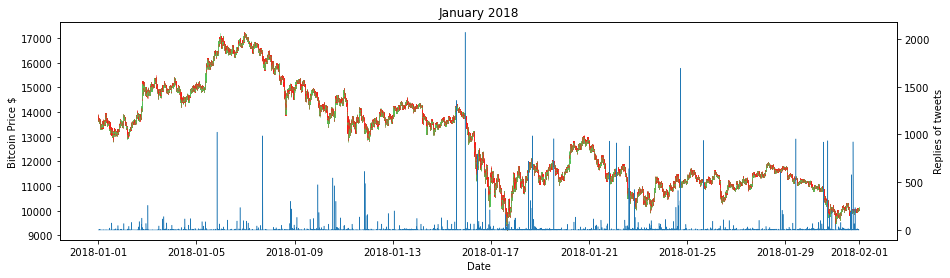

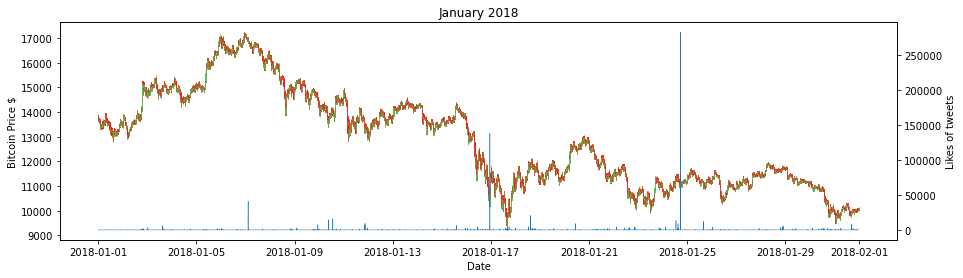

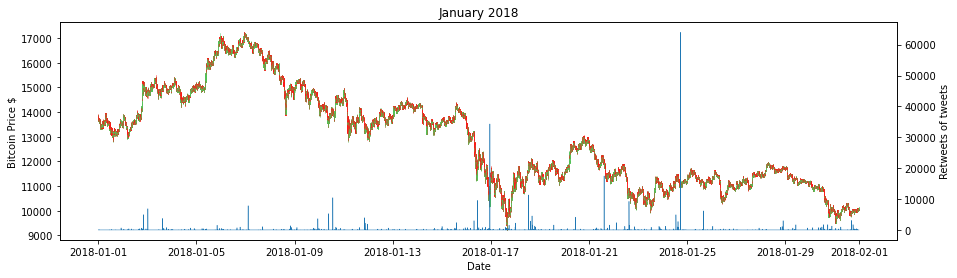

In [12]:
# Need more time to process!!!
from_date = "2018-01-01 00:00:00"
to_date = "2018-01-31 23:59:59"
month = "January "

price_btc_2018_month = price_btc_2018[(price_btc_2018["Timestamp"] >= from_date) & (price_btc_2018["Timestamp"] <= to_date)]
price_btc_2018_month["Timestamp"] = pd.to_datetime(price_btc_2018_month["Timestamp"])
df_price = price_btc_2018_month[["Timestamp", "Open", "High", "Low", "Close"]]
df_price["Timestamp"] = df_price["Timestamp"].apply(mdates.date2num)

tweets_btc_2018_month = tweets_btc_2018[(tweets_btc_2018["timestamp"] >= from_date) & (tweets_btc_2018["timestamp"] <= to_date)]
tweets_btc_2018_month["timestamp"] = pd.to_datetime(tweets_btc_2018_month["timestamp"])
tweets_btc_2018_month["timestamp"] = tweets_btc_2018_month["timestamp"].dt.tz_localize(None)
df_tweets = tweets_btc_2018_month

fig = plt.figure(figsize=(15,4))
f1 = fig.add_subplot()
candlestick_ohlc(f1, df_price.values, width=.01, colorup="#53c156", colordown="#ff1717")
f1.xaxis_date()
f1.set_ylabel("Bitcoin Price $")
f1.set_xlabel("Date")

f2 = f1.twinx() 
f2.plot(df_tweets.timestamp, df_tweets.replies, linewidth=.5)
f2.set_ylabel("Replies of tweets")

plt.title(month + "2018")
plt.show()

fig = plt.figure(figsize=(15,4))
f1 = fig.add_subplot()
candlestick_ohlc(f1, df_price.values, width=.01, colorup="#53c156", colordown="#ff1717")
f1.xaxis_date()
f1.set_ylabel("Bitcoin Price $")
f1.set_xlabel("Date")

f3 = f1.twinx() 
f3.plot(df_tweets.timestamp, df_tweets.likes, linewidth=.5)
f3.set_ylabel("Likes of tweets")

plt.title(month + "2018")
plt.show()

fig = plt.figure(figsize=(15,4))
f1 = fig.add_subplot()
candlestick_ohlc(f1, df_price.values, width=.01, colorup="#53c156", colordown="#ff1717")
f1.xaxis_date()
f1.set_ylabel("Bitcoin Price $")
f1.set_xlabel("Date")

f4 = f1.twinx() 
f4.plot(df_tweets.timestamp, df_tweets.retweets, linewidth=.5)
f4.set_ylabel("Retweets of tweets")

plt.title(month + "2018")
plt.show()

### Reused code
Create a function that we can reuse for our charts by month

### Volume Of Tweets
We add the total number of tweets per day, which also shows the current interest and the trend by days/weeks/months.

In [13]:
# Need more time to process!!!
def chart_by_period(from_date = "2018-01-01 00:00:00", to_date = "2018-01-31 23:59:59", month = "January" ):

    price_btc_2018_month = price_btc_2018[(price_btc_2018["Timestamp"] >= from_date) & (price_btc_2018["Timestamp"] <= to_date)]
    price_btc_2018_month["Timestamp"] = pd.to_datetime(price_btc_2018_month["Timestamp"])
    df_price = price_btc_2018_month[["Timestamp", "Open", "High", "Low", "Close"]]
    df_price["Timestamp"] = df_price["Timestamp"].apply(mdates.date2num)
    
    tweets_btc_2018_month = tweets_btc_2018[(tweets_btc_2018["timestamp"] >= from_date) & (tweets_btc_2018["timestamp"] <= to_date)]
    tweets_btc_2018_month["timestamp"] = pd.to_datetime(tweets_btc_2018_month["timestamp"])
    tweets_btc_2018_month["timestamp"] = tweets_btc_2018_month["timestamp"].dt.tz_localize(None)
    df_tweets = tweets_btc_2018_month
    
    fig = plt.figure(figsize=(15, 9))
    f1 = fig.add_subplot()
    candlestick_ohlc(f1, df_price.values, width=.01, colorup="#53c156", colordown="#ff1717")
    f1.xaxis_date()
    #f1.xaxis.set_major_formatter(mdates.DateFormatter('%d')) # %H:%M:%S -%y-%m
    f1.set_ylabel("Bitcoin Price $")
    f1.set_xlabel("Date")

    f2 = f1.twinx() 
    f2.plot(df_tweets.timestamp, df_tweets.replies, linewidth=.5)
    f2.set_ylabel("Replies of tweets")

    # f3 = fig.add_subplot()
    # f3.plot(df_tweets.groupby(df_tweets["timestamp"].dt.day).count())
    
    plt.title(month + "2018")
    #plt.xticks(rotation=45)
    plt.margins(0)
    plt.show()

    fig2 = plt.figure(figsize=(15,3))
    f = fig2.add_subplot()
    f.plot(df_tweets["timestamp"].groupby(df_tweets["timestamp"].dt.day).count())
    plt.title("Tweets Per Day")
    f.set_ylabel("Number of Tweets")
    f.set_yscale('log')
    #f.xaxis_date()
    #plt.xlim((1))
    plt.margins(0)
    f.set_xlabel("Date")
    plt.show()

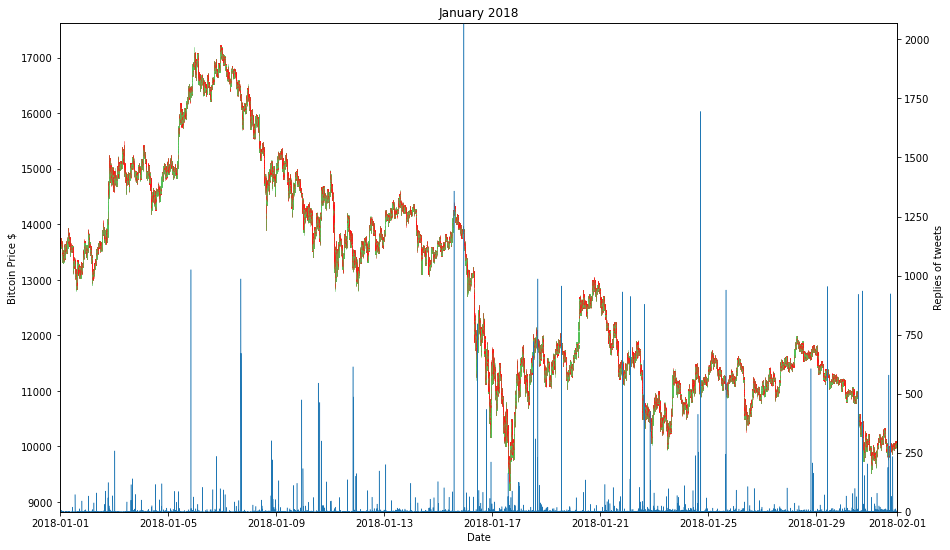

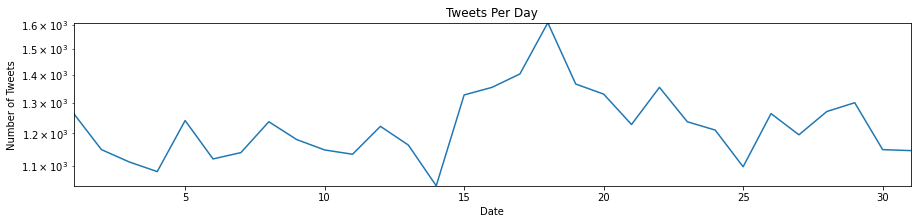

In [14]:
# Need more time to process!!!
chart_by_period("2018-01-01 00:00:00", "2018-01-31 23:59:59", "January ")

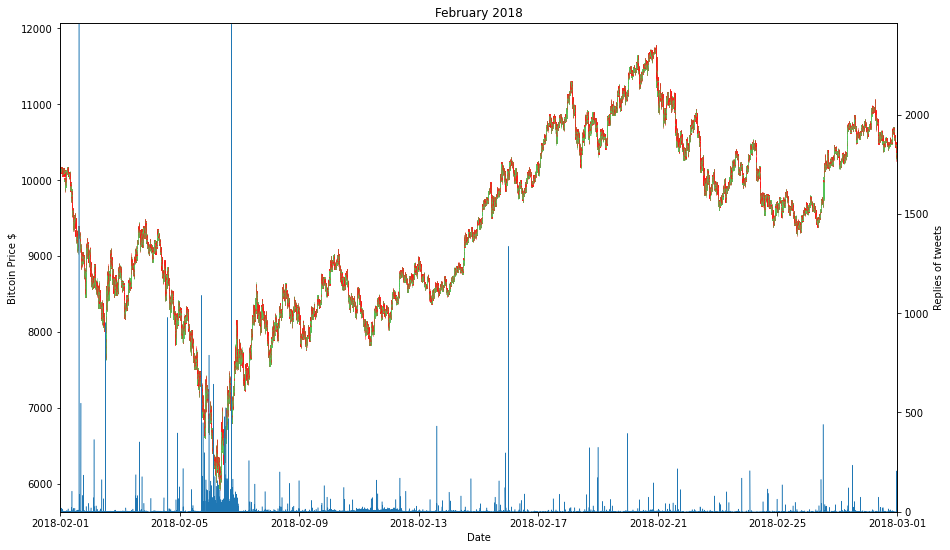

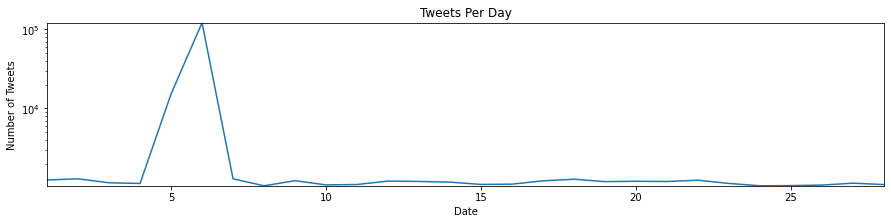

In [15]:
chart_by_period("2018-02-01 00:00:00", "2018-02-28 23:59:59", "February ")

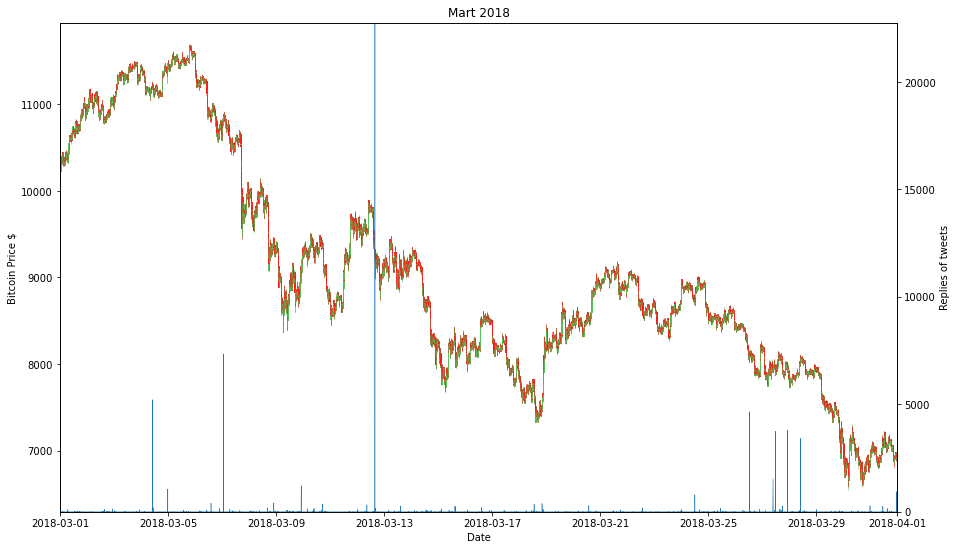

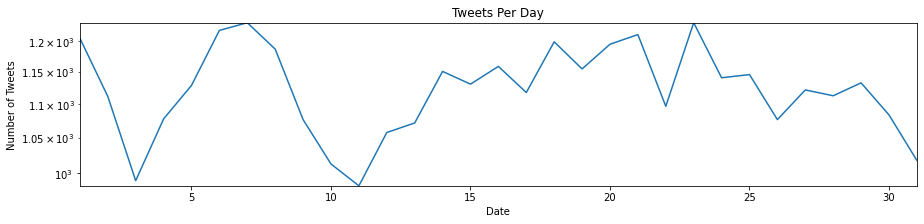

In [16]:
chart_by_period("2018-03-01 00:00:00", "2018-03-31 23:59:59", "Mart ")

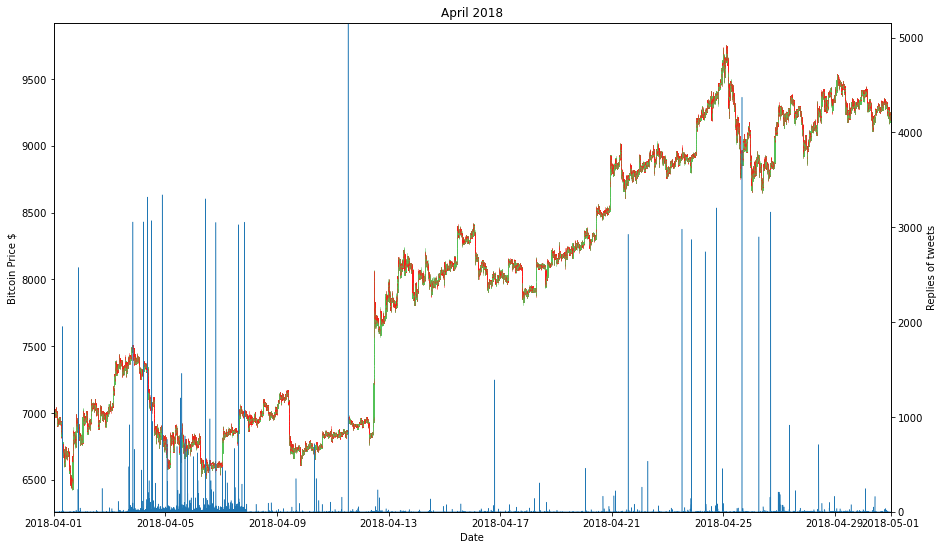

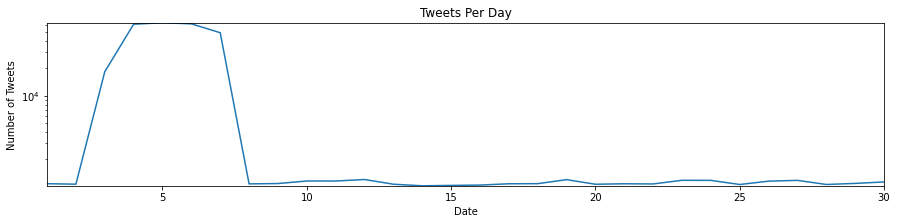

In [17]:
chart_by_period("2018-04-01 00:00:00", "2018-04-30 23:59:59", "April ")

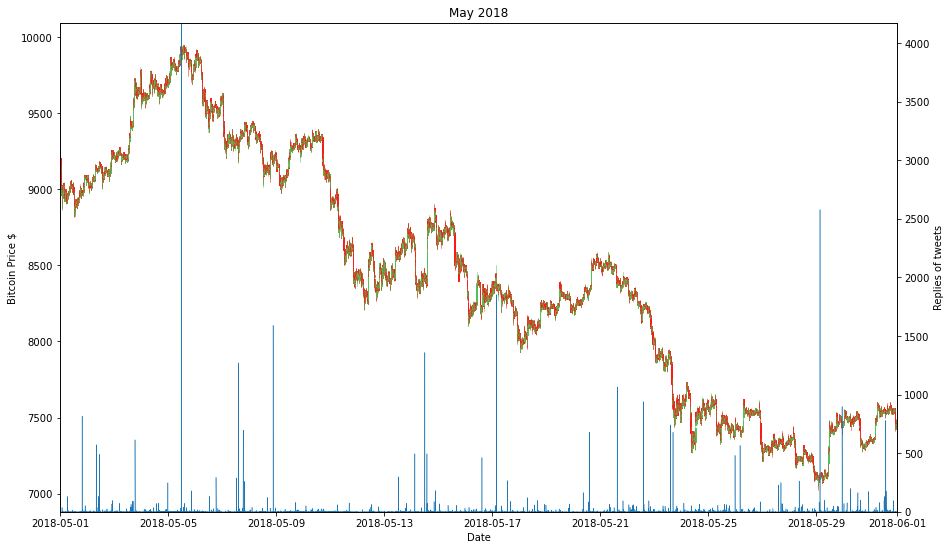

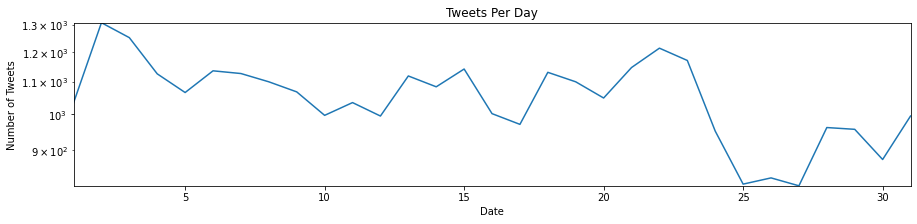

In [18]:
chart_by_period("2018-05-01 00:00:00", "2018-05-31 23:59:59", "May ")

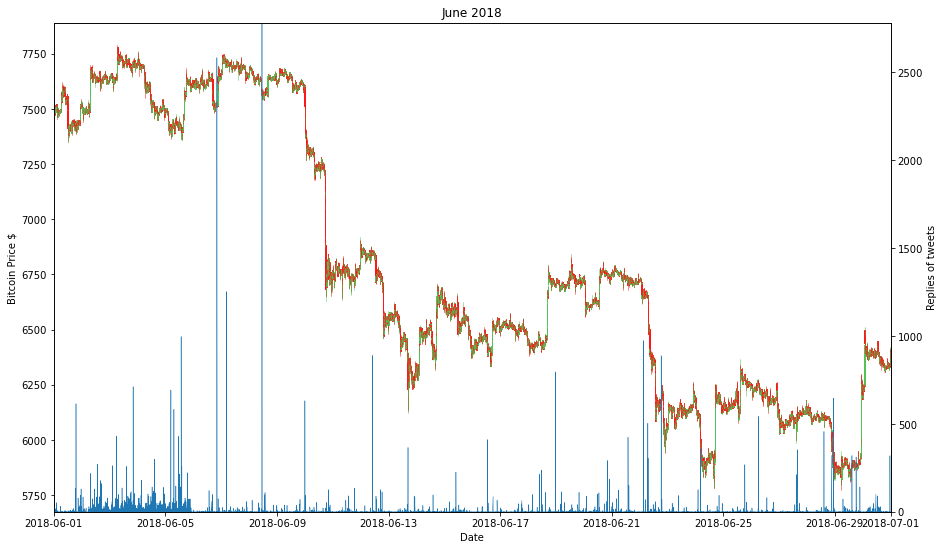

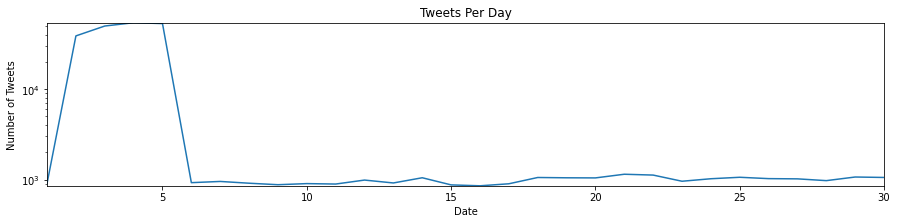

In [19]:
chart_by_period("2018-06-01 00:00:00", "2018-06-30 23:59:59", "June ")

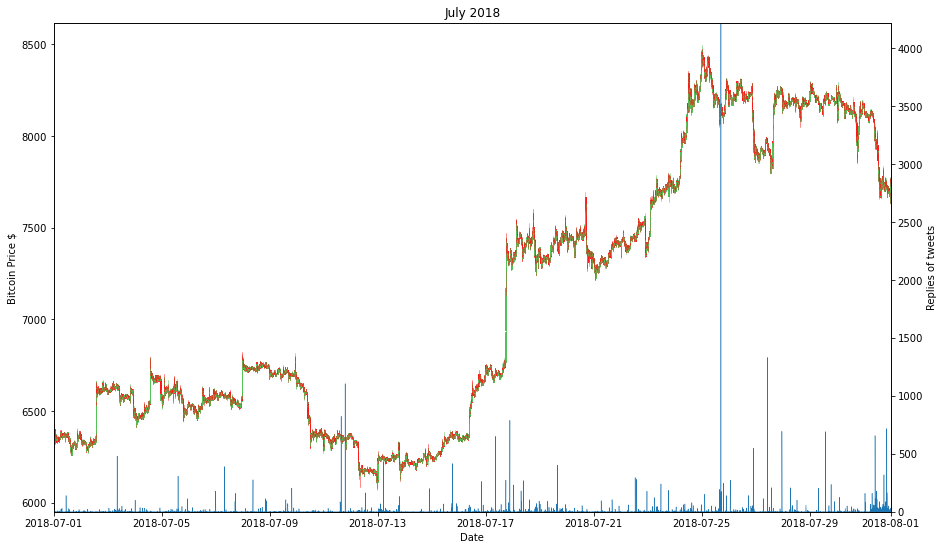

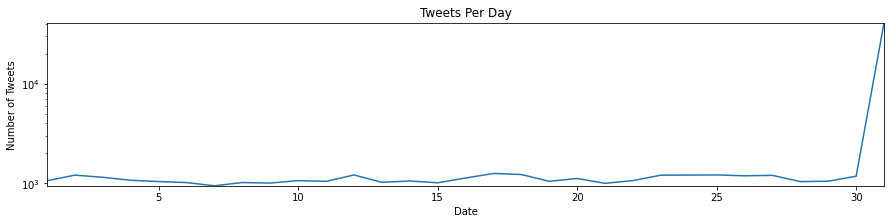

In [20]:
chart_by_period("2018-07-01 00:00:00", "2018-07-31 23:59:59", "July ")

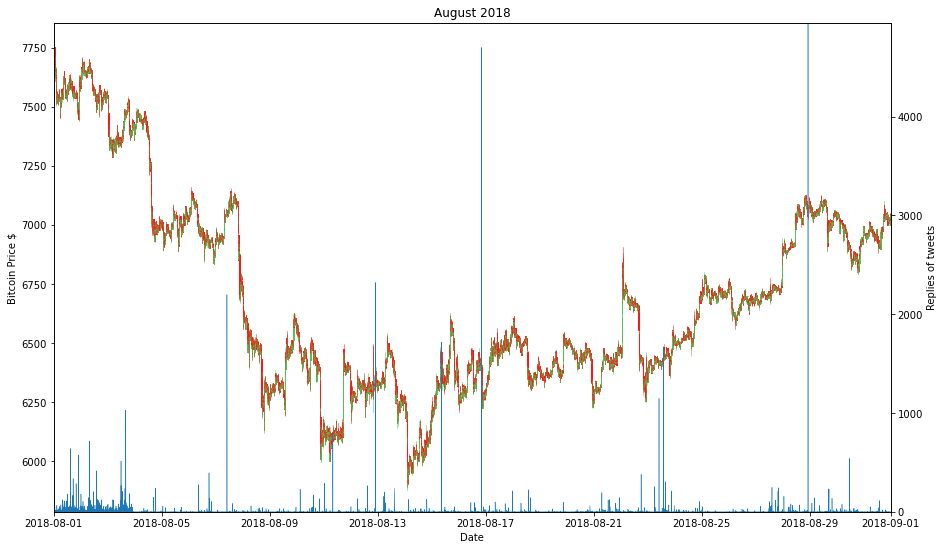

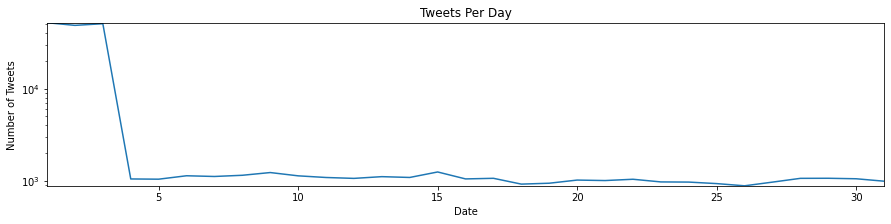

In [21]:
chart_by_period("2018-08-01 00:00:00", "2018-08-31 23:59:59", "August ")

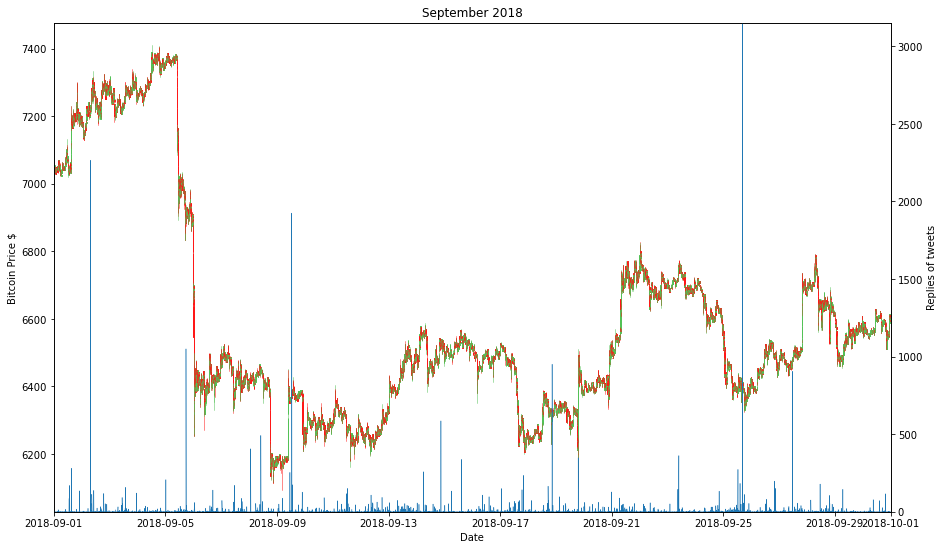

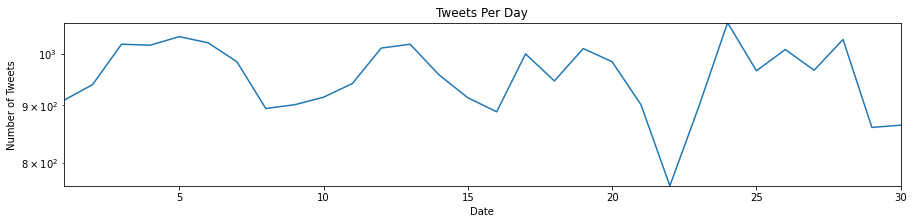

In [22]:
chart_by_period("2018-09-01 00:00:00", "2018-09-30 23:59:59", "September ")

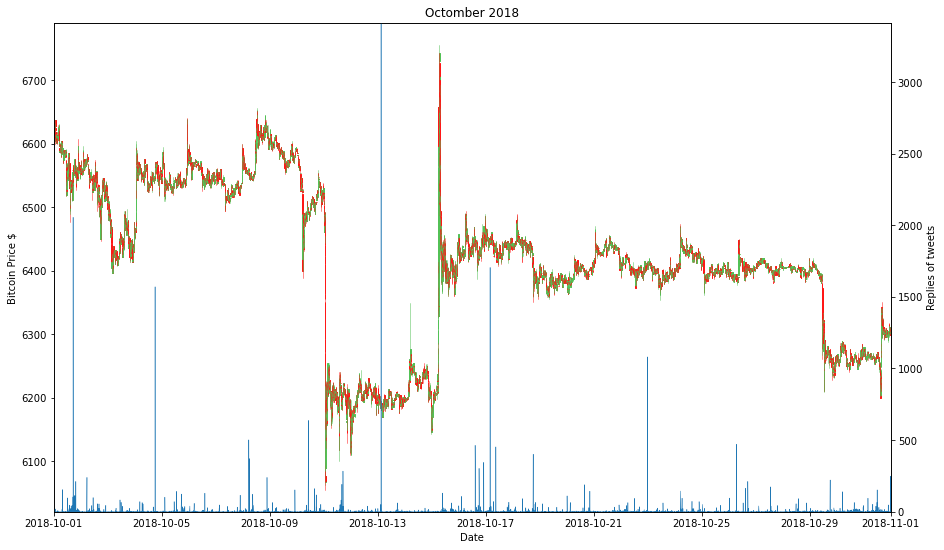

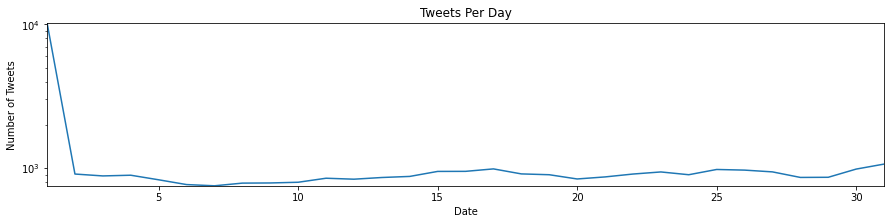

In [23]:
chart_by_period("2018-10-01 00:00:00", "2018-10-31 23:59:59", "Octomber ")

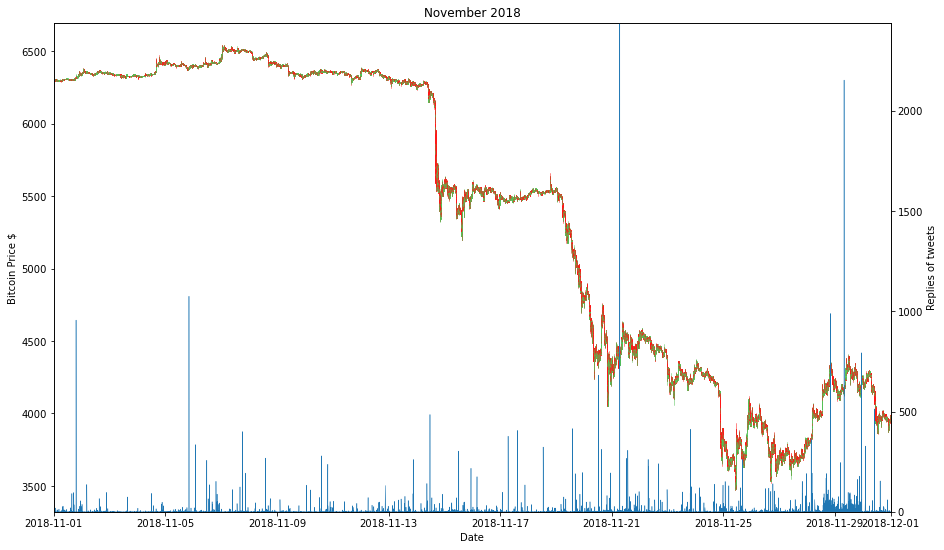

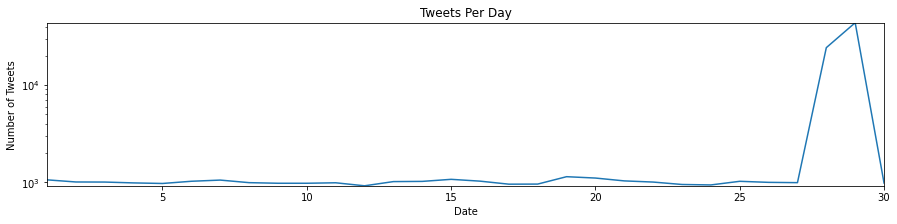

In [24]:
chart_by_period("2018-11-01 00:00:00", "2018-11-30 23:59:59", "November ")

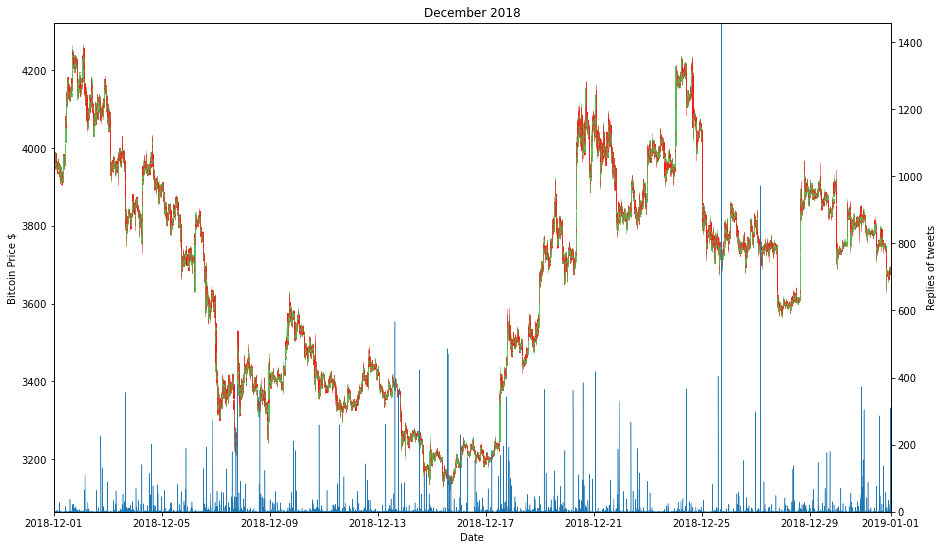

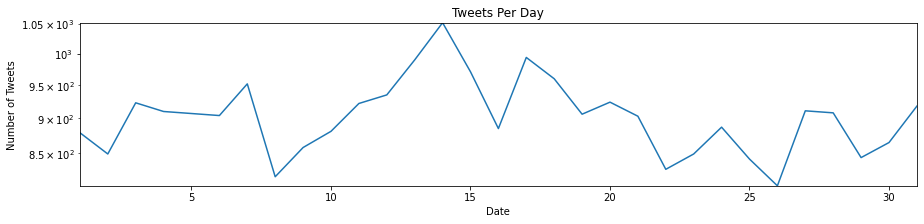

In [25]:
chart_by_period("2018-12-01 00:00:00", "2018-12-31 23:59:59", "December ")

### Conclusion
You can see how the activity of the tweets shows an upcoming movement, different from the previous one. Sometimes the movement starts immediately, sometimes after an interval of time. Overall, it shows good potential, as long as it is calculated correctly in a specific situation. For active traders following the fundamental news and analysis and other technical indicators, it would be a good helper.

### References
#### Big Data Sets
* https://www.kaggle.com/mczielinski/bitcoin-historical-data
* https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329

#### 2018 Data Sets
* www.kaggle.com/dataset/c7e296ccd23d8f0ddcf62482685a626993baac892491ecb9336875f6165f5595  Private, only link share

#### Other
* https://bitinfocharts.com/comparison/tweets-btc.html
* https://www.investopedia.com/news/bitcoin-price-holds-steady/
* https://www.coindesk.com/state-of-bitcoin-q2-2014-report-expanding-bitcoin-economy
* https://steemit.com/bitcoin/@rebelnewsnetwork/f-u-d-hits-crypto-markets-tips-on-how-to-handle-it-do-not-be-a-pussy
